In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [41]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [42]:
data = load_iris()

In [43]:
data.DESCR


'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [44]:
X=data.data
Y=data.target

In [45]:
X,Y
X.shape
Y.shape

(150,)

In [46]:
df=pd.DataFrame(X)

In [47]:
df.columns=["sepal_length","sepal_width","petal_length","petal_width"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df1=pd.DataFrame(Y)
df1.columns=['species']
df1.head()

,species
0,0
1,0
2,0
3,0
4,0


In [49]:
def flowers(num):
    if(num==0):
        return "setosa"
    elif(num==1):
        return "versicolor"
    else:
        return "virginica"

In [50]:
df1.species=df1.species.apply(flowers)
df1

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [51]:
df=pd.concat([df,df1],axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


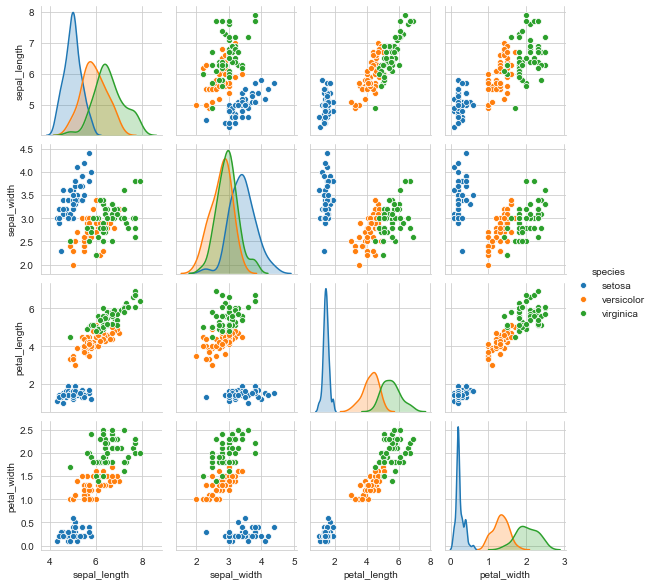

In [52]:
sns.pairplot(df,hue='species',height=2)

TypeError: 'NoneType' object is not iterable

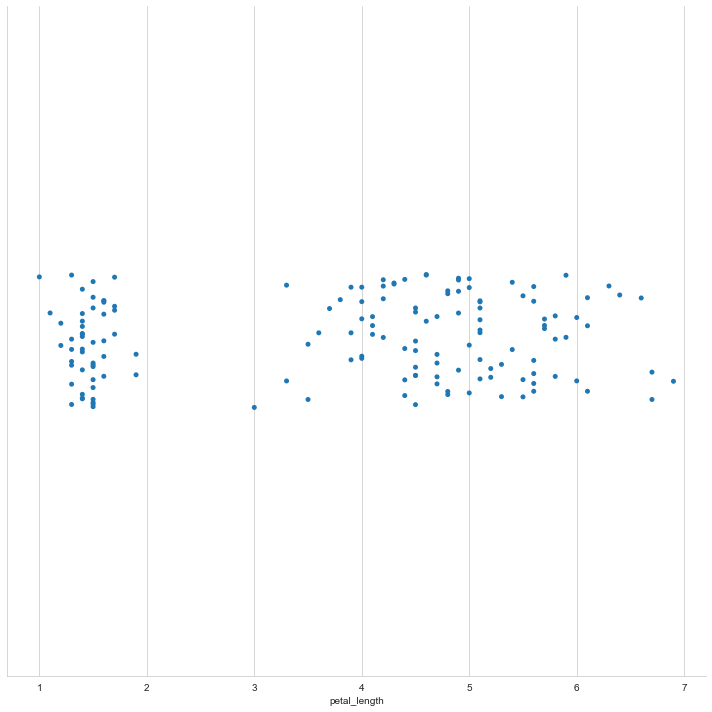

In [53]:
sns.catplot('petal_length',data=df,hue='species',height=10)

In [57]:
from sklearn.linear_model import LogisticRegression
algo1=LogisticRegression()


In [58]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3,random_state=4)

In [59]:
X_train.shape
Y_train.shape

(105,)

In [60]:
X_test.shape

(45, 4)

In [61]:
algo1.fit(X_train,Y_train)

C:\Users\tanya jha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
Y_pred=algo1.predict(X_test)

In [63]:
from sklearn import metrics

In [64]:
s= metrics.accuracy_score(Y_test,Y_pred)
s


0.9777777777777777

In [65]:
algo1.score(X_train,Y_train)

0.9809523809523809

In [66]:
algo1.score(X_test,Y_test)

0.9777777777777777

In [67]:
algo1.score(X_test,Y_pred)

1.0

In [68]:
#knn method in iris dataset
import math
def euclidean(instance1,instance2,length):
    distance=0;
    for x in range(length):
        distance+=math.pow((instance1[x]-instance2[x]),2)
    return (math.sqrt(distance))
    

In [69]:
data1=[2,2,2,'a']
data2=[4,4,4,'b']
distancearr=euclidean(data1,data2,3)
print (repr(distancearr))

3.4641016151377544


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [72]:
Y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

In [73]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9777777777777777


In [107]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

In [108]:
Y_pred
print (metrics.accuracy_score(Y_test,Y_pred))

0.9777777777777777


In [102]:
k_range=range(1,21)
accuracy=[]

In [103]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

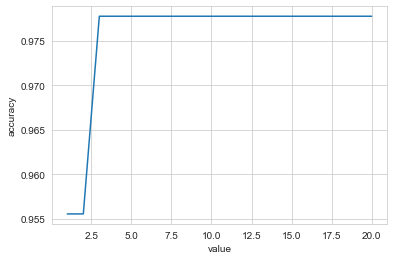

In [104]:
plt.plot(k_range,accuracy)
plt.xlabel('value')
plt.ylabel('accuracy')
plt.show()